<a href="https://colab.research.google.com/github/kvapiltomas/projects/blob/master/NY_airbnb_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#libraries import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import plotly.graph_objects as go
%matplotlib inline

**Loading** dataset

In [0]:
#check of data
NY = pd.read_csv('/content/drive/My Drive/AB_NYC_2019.csv')

NY.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [0]:
NY.info()
print('\nnumber of rows: '+ str(len(NY)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [0]:
#deleting columns: id(not importannt), host_name (deleting due to matter of privacy and missing values, moreover we can use host_id instead of host_name)

NY = NY.drop(['id', 'host_name'], axis = 1)

NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
name                              48879 non-null object
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 5.2+ MB


In [0]:
#checking null values
NY.isnull().sum()
#x = NY.isnull().sum().sort_values(ascending = False)[:5]
#y = NY.isnull().sum().sort_values(ascending = False)[:5].index
#plt.figure(figsize=(5,3))
#sns.barplot(x,y, palette = "GnBu_d")

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [0]:
#let notice that if the number_of_reviews is 0 then there last review and reviews_per_month values is null
NY1 = NY[NY.isna().any(axis = 1)]
NY1.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,Huge 2 BR Upper East Cental Park,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,Clean and Quiet in Brooklyn,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,Country space in the city,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


In [0]:
NY['reviews_per_month'].mean()

1.3732214298586884

In [0]:
NY['reviews_per_month'].fillna('0', inplace = True)
NY.drop(['last_review'], axis = 1, inplace = True)
NY['name'].fillna('Unknown', inplace = True)

In [0]:
NY.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [0]:
# We will skip the first column NAME as I will try to apply some NLP methods on this column later.
# So lets begin with the second column and so on.

top_hosts = NY['host_id'].value_counts()[:15]
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
Name: host_id, dtype: int64

In [0]:
#hosts with just one listing
one = NY.loc[NY['calculated_host_listings_count']== 1].iloc[:, 11]
one.sum()

32303

In [0]:
max_l = NY['calculated_host_listings_count'].max()
max_l

327

In [0]:
NY['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [0]:
NY.groupby('neighbourhood_group').agg('count').reset_index()

,neighbourhood_group,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Bronx,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091
1,Brooklyn,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104
2,Manhattan,21661,21661,21661,21661,21661,21661,21661,21661,21661,21661,21661,21661
3,Queens,5666,5666,5666,5666,5666,5666,5666,5666,5666,5666,5666,5666
4,Staten Island,373,373,373,373,373,373,373,373,373,373,373,373


In [0]:
NY.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [0]:
types = NY['room_type'].unique()
#NY['room_type'].loc[NY['room_type']== 'Private room'].count()
room_shares= []
for type in types:
    type_count = int(NY['room_type'].loc[NY['room_type']== type].count())
    share = (type_count/len(NY))*100
    room_shares.append(share)
print(room_shares)

[45.661110543000305, 51.96645873811229, 2.372430718887412]


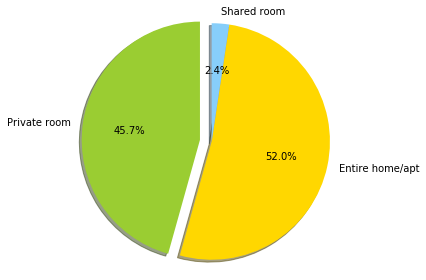

In [0]:
#labels = ['Private room', 'Entire home/apt', 'Shared room']
labels2 = NY['room_type'].unique()
shares = room_shares
explode = (0.1, 0, 0) 
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
texts = plt.pie(shares, explode = explode, colors=colors, labels = labels2, shadow=True, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'neighbourhoods')

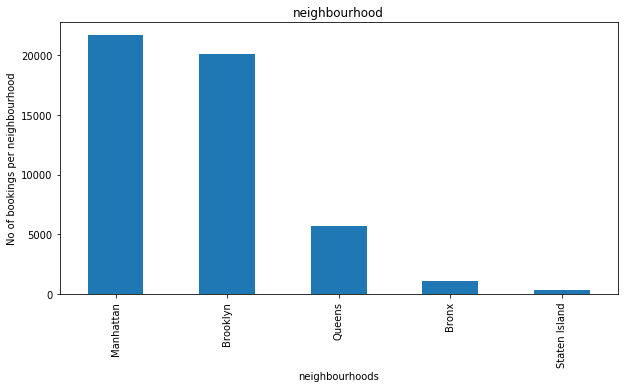

In [0]:
NY['neighbourhood_group'].value_counts().nlargest(40).plot(kind='bar', figsize = (10,5))
plt.title('neighbourhood')
plt.ylabel('No of bookings per neighbourhood')
plt.xlabel('neighbourhoods')

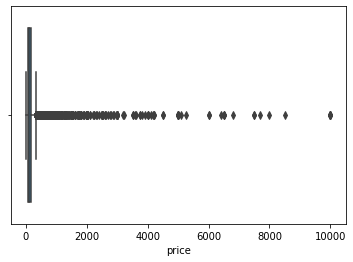

In [0]:
sns.boxplot(x = NY['price'])

In [0]:
NY.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
host_id,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.154950,0.203492
latitude,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,0.019517,-0.010983
longitude,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,-0.114713,0.082731
price,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,0.057472,0.081829
minimum_nights,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,0.127960,0.144303
number_of_reviews,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,-0.072376,0.172028
calculated_host_listings_count,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,1.000000,0.225701
availability_365,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.225701,1.000000


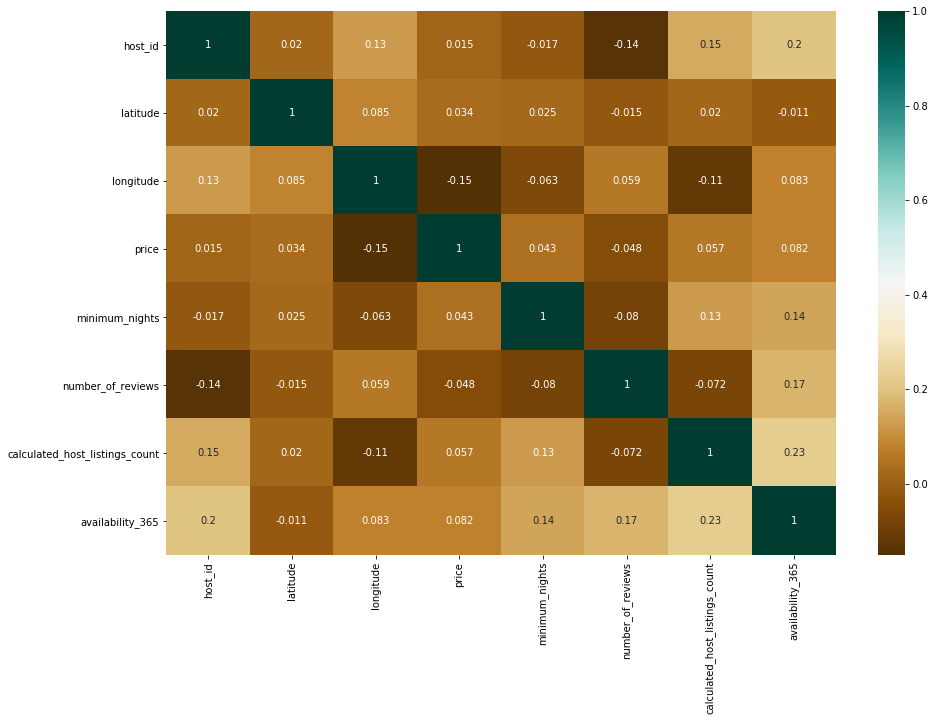

In [0]:
plt.figure(figsize = (15,10))
C = NY.corr()
sns.heatmap(C, cmap = 'BrBG',annot = True)

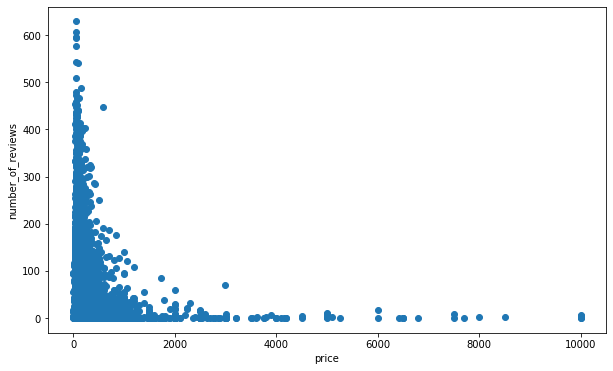

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(NY['price'], NY['number_of_reviews'])
ax.set_xlabel('price')
ax.set_ylabel('number_of_reviews')
plt.show()

In [0]:
top_hosts = NY['host_id'].value_counts()[0:10].index[0:10]
print(top_hosts)

Int64Index([219517861, 107434423,  30283594, 137358866,  12243051,  16098958,
             61391963,  22541573, 200380610,   7503643],
           dtype='int64')


In [0]:
top = NY[NY['host_id'].isin(list(top_hosts))]
print(top)

                                                    name  ...  availability_365
2631                 Amazing Designer Loft in BK Factory  ...               189
2636                     Spacious Factory Converted Loft  ...               249
2708                  Lovely Factory Loft in Greenpoint!  ...               277
2749                      All New Bohemian Chic 1BR Loft  ...               343
2782                 Huge 1 Bedroom Loft at Habitat 101!  ...               281
...                                                  ...  ...               ...
48723  Smart Nolita 1BR w/ W/D near famous cafes by B...  ...               325
48724  Dapper Hell's Kitchen 2BR w/  Gym + W/D + Door...  ...               338
48725  Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...  ...               228
48726  Beautiful Williamsburg 2BR w/ Skyline views + ...  ...               188
48727  Hip East Village 1BR w/ Gym, W/D, Doorman, nea...  ...               295

[1270 rows x 13 columns]


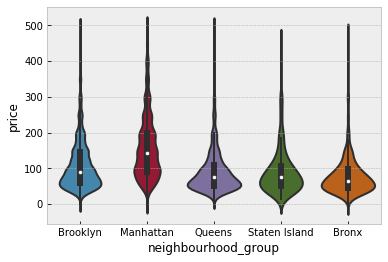

In [0]:
price_neighberhood = NY[NY['price'] < 500]
sns.violinplot(data=price_neighberhood, x = 'neighbourhood_group', y = 'price')

In [0]:
sub_brooklyn = NY.loc[NY['neighbourhood_group'] == 'Brooklyn' ]
sub_manhattan = NY.loc[NY['neighbourhood_group'] == 'Manhattan']
sub_queens = NY.loc[NY['neighbourhood_group'] == 'Queens']
sub_staten_island = NY.loc[NY['neighbourhood_group'] == 'Staten Island']
sub_bronx = NY.loc[NY['neighbourhood_group'] == 'Bronx']

In [0]:
print(sub_queens['neighbourhood_group'].unique())

['Queens']


In [0]:
price_distribution = go.Figure(data=[go.Histogram(x = sub_brooklyn['price'], name = 'Brooklyn', xbins = dict(start=0, end= 600, size = 15))])

price_distribution.add_trace(go.Histogram(x = sub_manhattan['price'], name = 'Manhatton'))
price_distribution.add_trace(go.Histogram(x = sub_queens['price'], name = 'Queens'))
price_distribution.add_trace(go.Histogram(x = sub_staten_island['price'], name = 'Staten Island'))
price_distribution.add_trace(go.Histogram(x = sub_bronx['price'], name = 'Bronx'))

price_distribution.update_layout(title_text='Price distribution per neighbourhood', xaxis_title_text = 'Price', yaxis_title_text = 'Count', barmode = 'overlay')
price_distribution.update_traces(opacity = 0.5)
price_distribution.show()